In [142]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [4]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [143]:
train_images.shape

(60000, 28, 28)

In [144]:
len(train_labels)

60000

In [145]:
(x_train,_),(x_test,_)= mnist.load_data()

x_train = x_train.astype('float32')/255 # 손 글씨니깐 RGB값 때문에 255로 나눔
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,RepeatVector, TimeDistributed

In [147]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras import models, layers

In [148]:
class Mish(Activation):
    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'mish'
        
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

# 사용자 정의 활성화 함수 등록
tf.keras.utils.get_custom_objects()['mish'] = Mish(mish)




class Autoencoder(tf.keras.Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self). __init__()
        self.encoder=tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='mish'),
            tf.keras.layers.Dense(64, activation='mish'),
            tf.keras.layers.Dense(32, activation='mish'),
        ])
        self.decoder=tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='mish'),
        tf.keras.layers.Dense(64, activation='mish'),
        tf.keras.layers.Dense(128, activation='mish'),
        tf.keras.layers.Dense(784, activation='sigmoid'),
        tf.keras.layers.Reshape((28,28))
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = Autoencoder(32)

In [149]:
autoencoder.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_path="./"

#acc도 포함된 결과를 나타내기위해 acc추가
autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])
history= autoencoder.fit(x_train, x_train,
                        epochs=150,
                        batch_size=256,
                        validation_data=(x_test, x_test)
                         )

Epoch 1/150
235/235 [==============================] - 3s 7ms/step - loss: 0.0661 - mse: 0.0661 - accuracy: 0.0970 - val_loss: 0.0422 - val_mse: 0.0422 - val_accuracy: 0.1451
Epoch 2/150
235/235 [==============================] - 1s 6ms/step - loss: 0.0361 - mse: 0.0361 - accuracy: 0.1668 - val_loss: 0.0317 - val_mse: 0.0317 - val_accuracy: 0.1815
Epoch 3/150
235/235 [==============================] - 1s 6ms/step - loss: 0.0292 - mse: 0.0292 - accuracy: 0.1962 - val_loss: 0.0266 - val_mse: 0.0266 - val_accuracy: 0.2020
Epoch 4/150
235/235 [==============================] - 1s 6ms/step - loss: 0.0255 - mse: 0.0255 - accuracy: 0.2109 - val_loss: 0.0238 - val_mse: 0.0238 - val_accuracy: 0.2145
Epoch 5/150
235/235 [==============================] - 1s 6ms/step - loss: 0.0227 - mse: 0.0227 - accuracy: 0.2218 - val_loss: 0.0208 - val_mse: 0.0208 - val_accuracy: 0.2269
Epoch 6/150
235/235 [==============================] - 2s 6ms/step - loss: 0.0200 - mse: 0.0200 - accuracy: 0.2329 - val_loss

235/235 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - accuracy: 0.3133 - val_loss: 0.0068 - val_mse: 0.0068 - val_accuracy: 0.3076
Epoch 94/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0067 - mse: 0.0067 - accuracy: 0.3144 - val_loss: 0.0068 - val_mse: 0.0068 - val_accuracy: 0.3071
Epoch 95/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0067 - mse: 0.0067 - accuracy: 0.3143 - val_loss: 0.0068 - val_mse: 0.0068 - val_accuracy: 0.3060
Epoch 96/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0067 - mse: 0.0067 - accuracy: 0.3144 - val_loss: 0.0068 - val_mse: 0.0068 - val_accuracy: 0.3092
Epoch 97/150
235/235 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - accuracy: 0.3147 - val_loss: 0.0068 - val_mse: 0.0068 - val_accuracy: 0.3119
Epoch 98/150
235/235 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - accuracy: 0.3148 - val_loss: 0.006

In [150]:
from tensorflow.keras.utils import plot_model

plot_model(autoencoder, show_shapes=True)

#accc
test_loss, test_mse, test_acc = autoencoder.evaluate(x_test, x_test, batch_size=100, verbose=2)
print(f'Test Loss: {test_loss}, Test MSE: {test_mse}, Test Accuracy: {test_acc}')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
100/100 - 0s - loss: 0.0061 - mse: 0.0061 - accuracy: 0.3133 - 239ms/epoch - 2ms/step
Test Loss: 0.006107088644057512, Test MSE: 0.006107089575380087, Test Accuracy: 0.3132892847061157


In [151]:
encoded_imgs = autoencoder.encoder.predict(x_test)
decoded_imgs = autoencoder.decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 976us/step


In [18]:
pip install matplotlib

  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.5.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached kiwisolver-1.4.5-cp37-cp37m-win_amd64.whl (55 kB)
Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

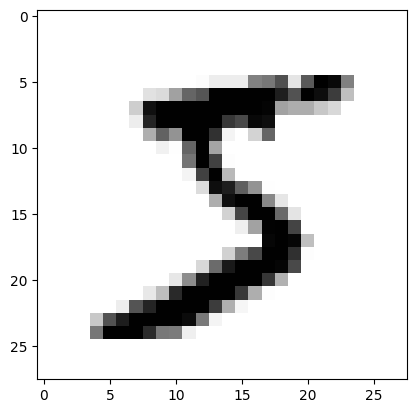

In [152]:
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

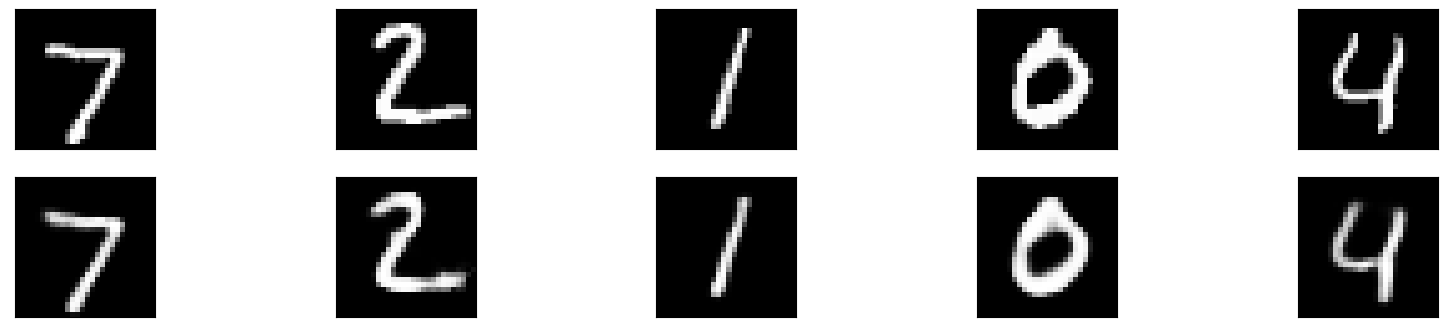

In [153]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #원본
    ax=plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #모델
    ax=plt.subplot(2, n, i + 1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

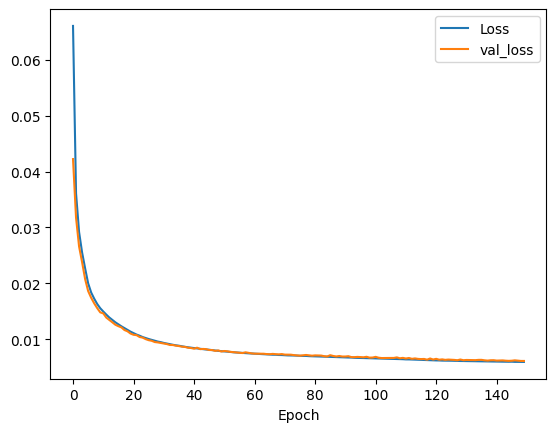

In [156]:
#모델의 loss값(mse)값 그래프 시각화
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epoch")
plt.ylabel("")
plt.legend()
plt.show()

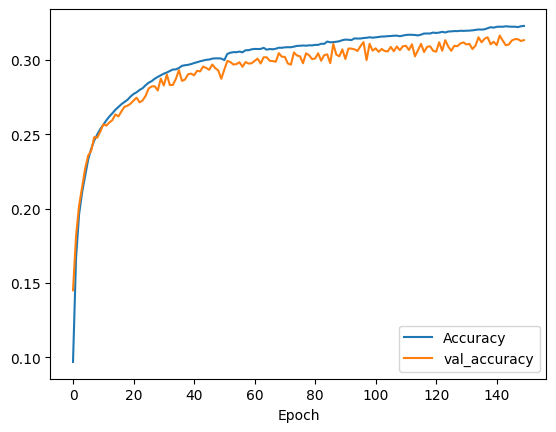

In [157]:

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("")
plt.legend()
plt.show()